In [1]:
import cv2
import numpy as np
import pandas as pd
import math
from scipy import signal
from scipy.ndimage import convolve
from PIL import Image
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_path = "C:\\Users\\30len\\bakalarka\\eyetrackingdata\\eyetrackingdata\\fixdens\\Raw\\"
part_names = ['alex', 'analene', 'brian', 'brian2', 'dan', 'david', 'fu', 'henrik', 'jasmin','kcheng', 'mark', 'michelle', 'mike', 'mohamed', 'neil', 'roshanak', 'ryan', 'terry', 'xiao', 'zoreh']
#processed som nepouzila
sum_names = len(part_names)
pict_no = 1
name_counter = 0

#path = "C:\\Users\\30len\\bakalarka\\eyetrackingdata\\eyetrackingdata\\fixdens\\Raw\\brian\\1.fix"
#potrebujem poskladat cestu ako je uvedene vyssie, je potrebne ale menit meno a fixacie pre obrazky

In [3]:
def load_file(path):
    with open(path, "r") as file:  # Use file to refer to the file object
        data = file.read()
        rows = data.split("\n")
    return rows

In [4]:
def count_fixations(rows):
    fix_count = 0
    if "No fixations!" not in rows[8]:
        count = re.search("\d+", rows[8])
        fix_count = int(count.group(0))
    return fix_count

In [8]:
def ret_positions(rows, fix_count, df_fix, part_index):
    counter = 1
#     print(part_index)
    df_fix.loc[part_index]['fixation_count'] = fix_count
    nazov = "fix_"
    nova_fix = ""
    x = []
    y = []
    
    for index, row in enumerate(rows):
        if ((index >=12) and (index < (12 + fix_count))):
            #tu budem mat iba riadky s fixaciami
            match_fix = re.findall(r'\d+', row)
            x_pos = int(match_fix[1])
            y_pos = int(match_fix[2])
            #potrebne osetrit hodnoty mimo obraz!!!!!!
            if ((x_pos > 1024) or (x_pos < 0) or (y_pos > 768) or (y_pos < 0)):
                print("here!!! ", "participant ", part_index, "counter", counter )
                vysledok = -1
            else:
                x.append(x_pos)
                y.append(y_pos)
                vysledok = x_pos * 1024 + y_pos
            nova_fix = nazov + str(counter)
            counter = counter + 1
#             print("nova fixacia nazov", nova_fix, "counter", counter)
            if nova_fix not in df_fix:
#                 df_fix[nova_fix] = np.nan 
                df_fix[nova_fix] = -1
            df_fix.loc[part_index][nova_fix] = vysledok
#             print("pozicia x: ", x_pos, "pozicia y: ", y_pos)
#             print("vysledok:", vysledok)

    
#     print("fix_count", fix_count, "participant index ", part_index)
    plt.ylim(0, 768)
    plt.xlim(0, 1024)
    plt.scatter(x, y)
    plt.title("participant cislo " + str(part_index))
    plt.show()
    return df_fix

df_fix_1


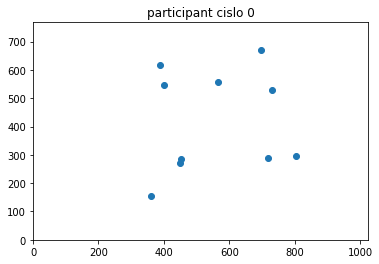

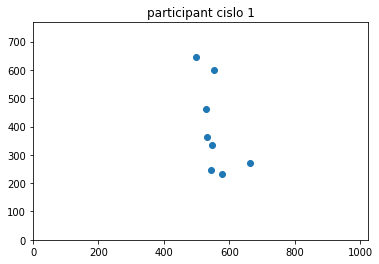

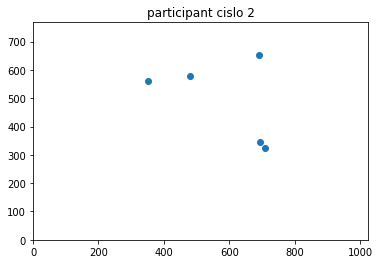

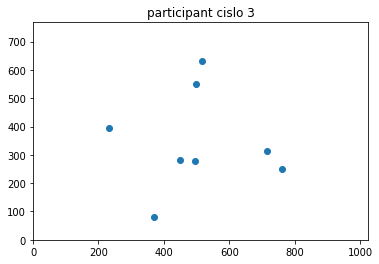

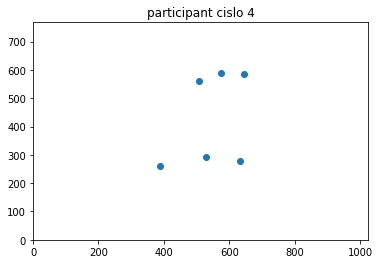

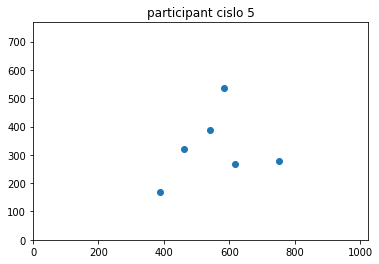

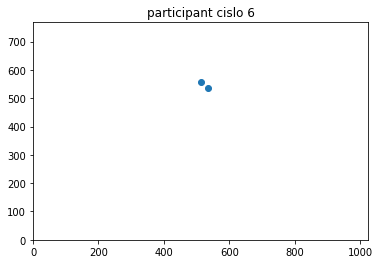

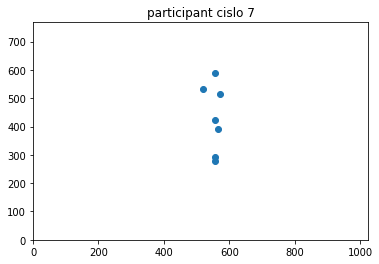

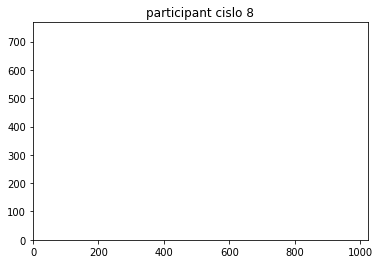

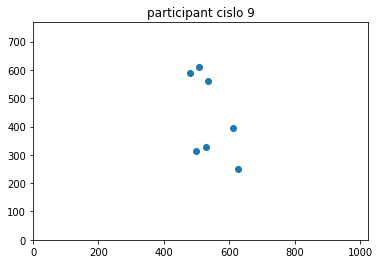

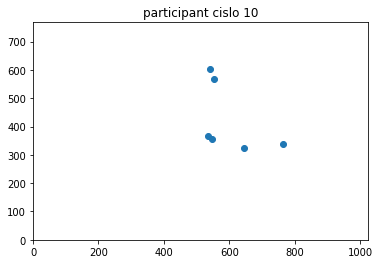

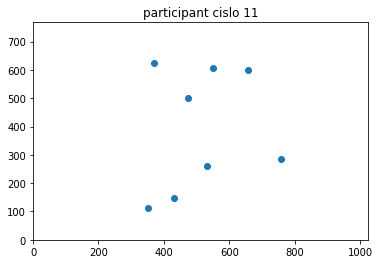

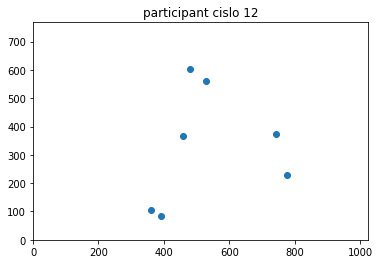

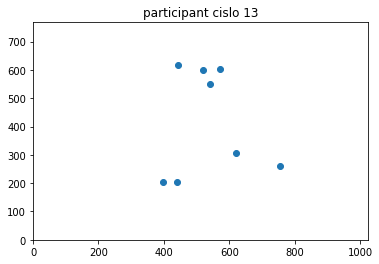

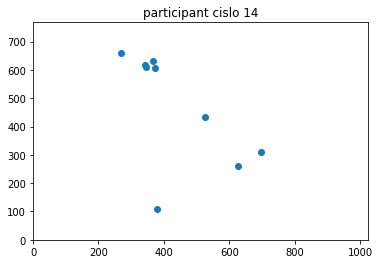

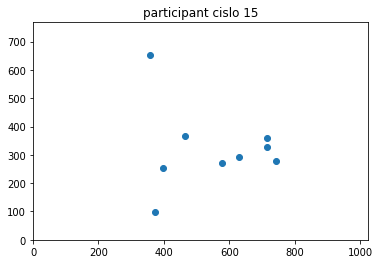

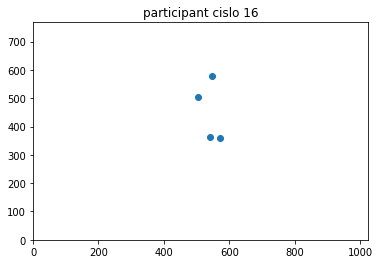

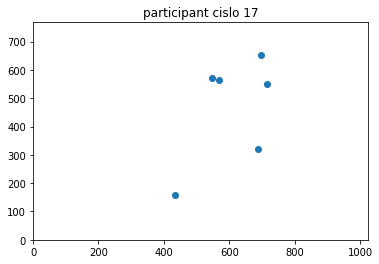

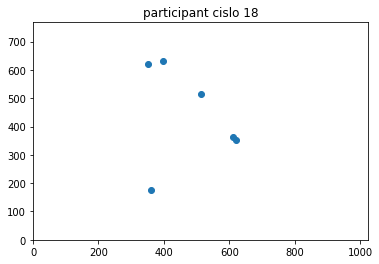

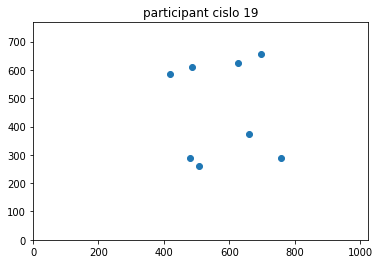

,fixation_count,fix_1,fix_2,fix_3,fix_4,fix_5,fix_6,fix_7,fix_8,fix_9,fix_10
0,10,460046,369820,580140,410148,396907,715424,748048,736544,824615,462111
1,8,558326,566871,593128,678160,511622,545131,561486,543182,-1,-1
2,5,492099,361010,708235,711001,727366,-1,-1,-1,-1,-1
3,8,508184,511528,530038,378961,778490,733497,459034,236939,-1,-1
4,6,541990,519729,662090,590413,648471,398597,-1,-1,-1,-1
5,6,473407,597527,632075,770328,397480,555397,-1,-1,-1,-1
6,2,549399,527917,-1,-1,-1,-1,-1,-1,-1,-1
7,7,569638,580998,533014,568908,569766,587267,569622,-1,-1,-1
8,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,7,542023,493134,518754,549426,628106,509243,643323,-1,-1,-1


In [10]:
zakladny_nazov = "df_fix_"
d = {}
    
for index in range(1):
    print(zakladny_nazov + str(index+1))
    novy_nazov = zakladny_nazov + str(index+1)
    d[novy_nazov] = pd.DataFrame(index=range(0, sum_names))
    nazov = "fix_1"
#     d[novy_nazov]['fixation_count'] = np.nan
#     d[novy_nazov][nazov] = np.nan
    d[novy_nazov]['fixation_count'] = -1
    d[novy_nazov][nazov] = -1

    for index_2, name in enumerate(part_names):
        path = base_path + part_names[index_2] + "\\" + str(index+1) + ".fix"
        rows = load_file(path)
        fix_count = count_fixations(rows)
        d[novy_nazov]['fixation_count'][index_2] = fix_count
#         print(d[novy_nazov]['fixation_count'][index_2])
        d[novy_nazov] = ret_positions(rows, fix_count, d[novy_nazov], index_2)
        
d['df_fix_1']

In [11]:
# df_fix = pd.DataFrame(index=range(0, sum_names))
# nazov = "fix_1"
# # df_fix['fixation_count'] = np.nan
# # df_fix[nazov] = np.nan
# df_fix['fixation_count'] = -1
# df_fix[nazov] = -1

# for index, name in enumerate(part_names):
# #     print("----------------")
# #     print("novy participant - " + name)
# #     print("----------------")
#     path = base_path + part_names[index] + "\\" + str(pict_no) + ".fix"
#     rows = load_file(path)
# #     fix_count = count_fixations(rows)
#     df_fix = ret_positions(rows, df_fix, index)
    
# df_fix

In [12]:
# zakladny_nazov = "df_fix_"
# d = {}
# index = 0    
# print(zakladny_nazov + str(index+1))
# novy_nazov = zakladny_nazov + str(index+1)
# # d[novy_nazov] = pd.DataFrame(index=range(0, sum_names), columns = ['name', 'fixation_count'])
# d[novy_nazov] = pd.DataFrame(index=range(0, sum_names), columns = ['fixation_count'])
# nazov = "fix_1"
# d[novy_nazov][nazov] = -1
# d

In [13]:
# for index_2, name in enumerate(part_names):
# #     d[novy_nazov]['name'][index_2] = name
#     path = base_path + part_names[index_2] + "\\" + str(index+1) + ".fix"
#     rows = load_file(path)
#     fix_count = count_fixations(rows)
#     print(fix_count)
#     d[novy_nazov]['fixation_count'][index_2] = fix_count
#     d[novy_nazov]['name'][index_2] = name
# #     print(d[novy_nazov]['fixation_count'][index_2])
#     d[novy_nazov] = ret_positions(rows, fix_count, d[novy_nazov], index_2)

In [14]:
# d

In [15]:
# zakladny_nazov = "df_fix_"
# d = {}
    
# for index in range(120):
#     print(zakladny_nazov + str(index+1))
#     novy_nazov = zakladny_nazov + str(index+1)
#     d[novy_nazov] = pd.DataFrame(index=range(0, sum_names), columns = ['name', 'fixation_count'])
#     nazov = "fix_1"
# #     d[novy_nazov]['fixation_count'] = np.nan
# #     d[novy_nazov][nazov] = np.nan
# #     d[novy_nazov]['name'] = ""
# #     d[novy_nazov]['fixation_count'] = -1
#     d[novy_nazov][nazov] = -1
    

#     for index_2, name in enumerate(part_names):
# #         d[novy_nazov]['name'][index_2] = name
#         path = base_path + part_names[index_2] + "\\" + str(index+1) + ".fix"
#         rows = load_file(path)
# #         fix_count = count_fixations(rows)
# #         d[novy_nazov]['fixation_count'][index_2] = fix_count
# #         print(d[novy_nazov]['fixation_count'][index_2])
#         d[novy_nazov] = ret_positions(rows, d[novy_nazov], index_2)
        
        
# #d

In [16]:
#d['df_fix_1']['name'][0]

In [17]:
d['df_fix_1']

,fixation_count,fix_1,fix_2,fix_3,fix_4,fix_5,fix_6,fix_7,fix_8,fix_9,fix_10
0,10,460046,369820,580140,410148,396907,715424,748048,736544,824615,462111
1,8,558326,566871,593128,678160,511622,545131,561486,543182,-1,-1
2,5,492099,361010,708235,711001,727366,-1,-1,-1,-1,-1
3,8,508184,511528,530038,378961,778490,733497,459034,236939,-1,-1
4,6,541990,519729,662090,590413,648471,398597,-1,-1,-1,-1
5,6,473407,597527,632075,770328,397480,555397,-1,-1,-1,-1
6,2,549399,527917,-1,-1,-1,-1,-1,-1,-1,-1
7,7,569638,580998,533014,568908,569766,587267,569622,-1,-1,-1
8,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,7,542023,493134,518754,549426,628106,509243,643323,-1,-1,-1


In [18]:
arr = d['df_fix_1'].as_matrix(columns=d['df_fix_1'].columns[1:])
Z = np.vstack(arr)
Z

C:\Users\30len\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[460046, 369820, 580140, 410148, 396907, 715424, 748048, 736544,
        824615, 462111],
       [558326, 566871, 593128, 678160, 511622, 545131, 561486, 543182,
            -1,     -1],
       [492099, 361010, 708235, 711001, 727366,     -1,     -1,     -1,
            -1,     -1],
       [508184, 511528, 530038, 378961, 778490, 733497, 459034, 236939,
            -1,     -1],
       [541990, 519729, 662090, 590413, 648471, 398597,     -1,     -1,
            -1,     -1],
       [473407, 597527, 632075, 770328, 397480, 555397,     -1,     -1,
            -1,     -1],
       [549399, 527917,     -1,     -1,     -1,     -1,     -1,     -1,
            -1,     -1],
       [569638, 580998, 533014, 568908, 569766, 587267, 569622,     -1,
            -1,     -1],
       [    -1,     -1,     -1,     -1,     -1,     -1,     -1,     -1,
            -1,     -1],
       [542023, 493134, 518754, 549426, 628106, 509243, 643323,     -1,
            -1,     -1],
       [547183, 565816, 554586

In [19]:
# convert to np.float32
Z = np.float32(Z)

In [20]:
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


In [21]:
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [22]:
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
label

array([[0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [23]:
d['df_fix_1']['fixation_count']

0     10
1      8
2      5
3      8
4      6
5      6
6      2
7      7
8      0
9      7
10     6
11     8
12     7
13     8
14     9
15     9
16     4
17     6
18     6
19     8
Name: fixation_count, dtype: int64

In [24]:
ret_min = min(d['df_fix_1']['fixation_count'])
ret_min

0

In [27]:
new_arr = sorted(set(d['df_fix_1']['fixation_count']))
if (min(new_arr) == 0):
    new_arr.remove(0)
new_arr

[2, 4, 5, 6, 7, 8, 9, 10]

In [28]:
my_min = min(new_arr)
my_min

2

In [48]:
new_df = pd.DataFrame()


,fixation_count,fix_1,fix_2,fix_3,fix_4,fix_5,fix_6,fix_7,fix_8,fix_9,fix_10
7,7,569638,580998,533014,568908,569766,587267,569622,-1,-1,-1
8,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,7,542023,493134,518754,549426,628106,509243,643323,-1,-1,-1
10,6,547183,565816,554586,560485,659782,781651,-1,-1,-1,-1
11,8,486902,563806,674392,379504,440468,359537,776479,545028,-1,-1
12,7,471408,542258,493148,368745,400469,796901,760180,-1,-1,-1
13,8,554533,454251,533080,587355,450763,406731,635185,772357,-1,-1
14,9,540082,376438,349800,277140,354916,383582,713015,643334,388205,-1
15,9,476527,368270,405759,592142,646438,382051,761112,732488,732519,-1
16,4,559683,587112,555370,515577,-1,-1,-1,-1,-1,-1


In [5]:
def random_fun(rows, hodnota, df_fix, part_index):
    counter = 1
#     print(part_index)
#     df_fix.loc[part_index]['fixation_count'] = 
    nazov = "fix_"
    nova_fix = ""
    x = []
    y = []
    
    for index, row in enumerate(rows):
        if ((index >=12) and (index < (12 + hodnota))):
            #tu budem mat iba riadky s fixaciami
            match_fix = re.findall(r'\d+', row)
            x_pos = int(match_fix[1])
            y_pos = int(match_fix[2])
            #potrebne osetrit hodnoty mimo obraz!!!!!!
            if ((x_pos > 1024) or (x_pos < 0) or (y_pos > 768) or (y_pos < 0)):
                print("here!!! ", "participant ", part_index, "counter", counter )
                vysledok = -1
            else:
                x.append(x_pos)
                y.append(y_pos)
                vysledok = x_pos * 1024 + y_pos
            nova_fix = nazov + str(counter)
            counter = counter + 1
#             print("nova fixacia nazov", nova_fix, "counter", counter)
            if nova_fix not in df_fix:
#                 df_fix[nova_fix] = np.nan 
                df_fix[nova_fix] = -1
            df_fix.loc[part_index][nova_fix] = vysledok
#             print("pozicia x: ", x_pos, "pozicia y: ", y_pos)
#             print("vysledok:", vysledok)

    
#     print("fix_count", fix_count, "participant index ", part_index)
    plt.ylim(0, 768)
    plt.xlim(0, 1024)
    plt.scatter(x, y)
    plt.title("participant cislo " + str(part_index))
    plt.show()
    return df_fix

df_fix_1


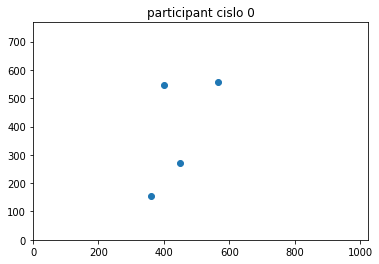

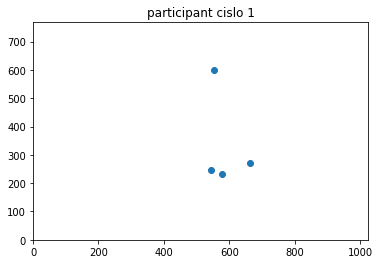

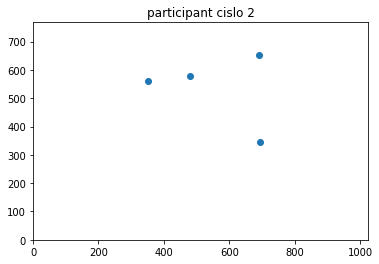

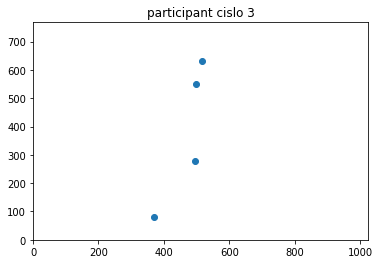

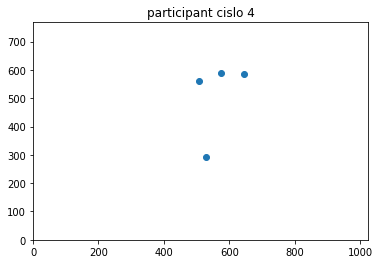

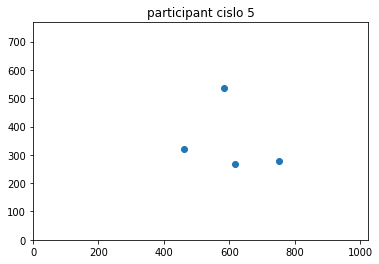

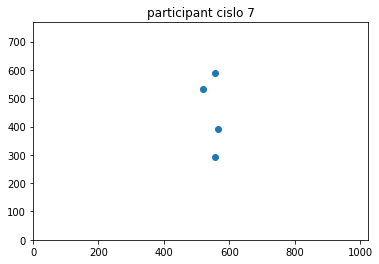

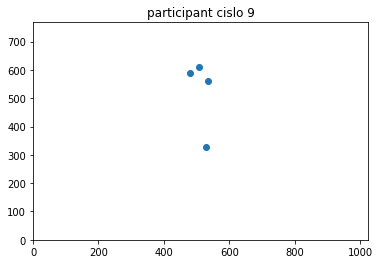

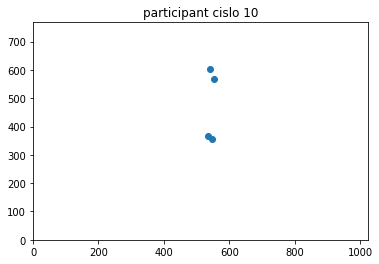

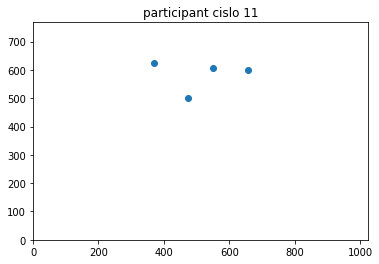

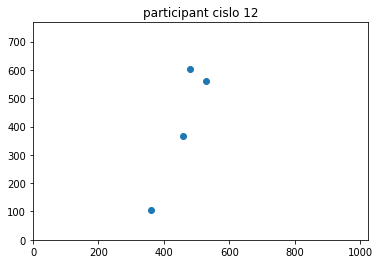

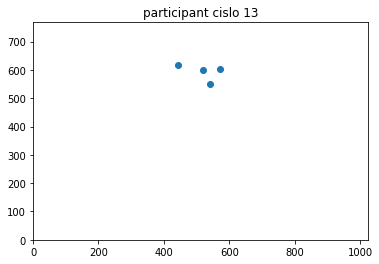

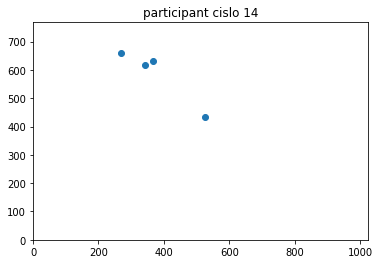

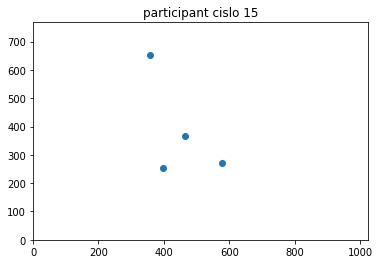

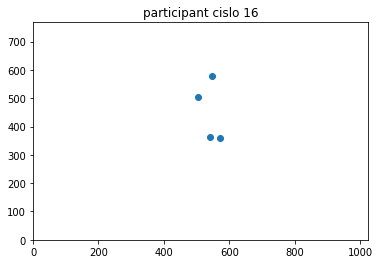

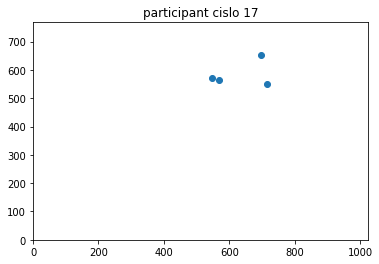

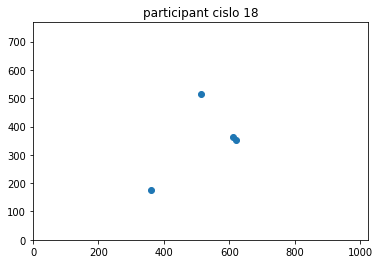

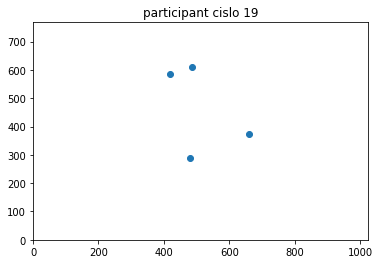

,fixation_count,fix_1,fix_2,fix_3,fix_4
0,-1,460046,369820,580140,410148
1,-1,558326,566871,593128,678160
2,-1,492099,361010,708235,711001
3,-1,508184,511528,530038,378961
4,-1,541990,519729,662090,590413
5,-1,473407,597527,632075,770328
6,-1,-1,-1,-1,-1
7,-1,569638,580998,533014,568908
8,-1,-1,-1,-1,-1
9,-1,542023,493134,518754,549426


In [7]:
zakladny_nazov = "df_fix_"
d = {}
    
for index in range(1):
    print(zakladny_nazov + str(index+1))
    novy_nazov = zakladny_nazov + str(index+1)
    d[novy_nazov] = pd.DataFrame(index=range(0, sum_names))
    nazov = "fix_1"
#     d[novy_nazov]['fixation_count'] = np.nan
#     d[novy_nazov][nazov] = np.nan
    d[novy_nazov]['fixation_count'] = -1
    d[novy_nazov][nazov] = -1

    fix_count_arr = []
#     tuto treba urobit magic, kolko fixacii budem chciet
    nahradit_hodnotou = 4
    
    for index_2, name in enumerate(part_names):
        path = base_path + part_names[index_2] + "\\" + str(index+1) + ".fix"
        rows = load_file(path)
        fix_count = count_fixations(rows)
        fix_count_arr.append(fix_count)
        
    for index_3, fix in enumerate(fix_count_arr):
        if (fix >= nahradit_hodnotou):
            path = base_path + part_names[index_3] + "\\" + str(index+1) + ".fix"
            rows = load_file(path)
            d[novy_nazov] = random_fun(rows, nahradit_hodnotou, d[novy_nazov], index_3)
        
#     d[novy_nazov]['fixation_count'][index_2] = fix_count
#       print(d[novy_nazov]['fixation_count'][index_2])

d['df_fix_1']
# fix_count_arr

In [8]:
# Get names of indexes for which column fix_2 has value -1
indexNames = d['df_fix_1'][ d['df_fix_1']['fix_4'] == -1 ].index
# print(indexNames)
# Delete these row indexes from dataFrame
d['df_fix_1'].drop(indexNames , inplace=True)
d['df_fix_1']

,fixation_count,fix_1,fix_2,fix_3,fix_4
0,-1,460046,369820,580140,410148
1,-1,558326,566871,593128,678160
2,-1,492099,361010,708235,711001
3,-1,508184,511528,530038,378961
4,-1,541990,519729,662090,590413
5,-1,473407,597527,632075,770328
7,-1,569638,580998,533014,568908
9,-1,542023,493134,518754,549426
10,-1,547183,565816,554586,560485
11,-1,486902,563806,674392,379504


In [9]:
arr = d['df_fix_1'].as_matrix(columns=d['df_fix_1'].columns[1:])
Z = np.vstack(arr)
Z

C:\Users\30len\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[460046, 369820, 580140, 410148],
       [558326, 566871, 593128, 678160],
       [492099, 361010, 708235, 711001],
       [508184, 511528, 530038, 378961],
       [541990, 519729, 662090, 590413],
       [473407, 597527, 632075, 770328],
       [569638, 580998, 533014, 568908],
       [542023, 493134, 518754, 549426],
       [547183, 565816, 554586, 560485],
       [486902, 563806, 674392, 379504],
       [471408, 542258, 493148, 368745],
       [554533, 454251, 533080, 587355],
       [540082, 376438, 349800, 277140],
       [476527, 368270, 405759, 592142],
       [559683, 587112, 555370, 515577],
       [560699, 715406, 731687, 583222],
       [526850, 635231, 369840, 626028],
       [428616, 498275, 675188, 492833]], dtype=int64)

In [10]:
# convert to np.float32
Z = np.float32(Z)

In [11]:
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [12]:
ret,label,center=cv2.kmeans(Z,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [13]:
# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
label

array([[0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [14]:
# label.value_counts().plot(kind='bar')

In [29]:
d['df_fix_1']['fix_1']

0     460046
1     558326
2     492099
3     508184
4     541990
5     473407
7     569638
9     542023
10    547183
11    486902
12    471408
13    554533
14    540082
15    476527
16    559683
17    560699
18    526850
19    428616
Name: fix_1, dtype: int64

In [30]:
# vypocitanie x a y spatne
temp_fix = d['df_fix_1']['fix_1'][0]
temp_x = int(temp_fix / 1024)
temp_y = temp_fix % 1024

In [42]:
x = []
y = []

for i in range(4):
    for index, value in enumerate(d['df_fix_1']['fix_'+str(i+1)]):
        temp_fix = value
        temp_x = int(temp_fix / 1024)
        temp_y = temp_fix % 1024
        x.append(temp_x)
        y.append(temp_y)

In [45]:
print(x)
print(y)
print(label.flatten())
array = label.flatten()
array = array.tolist()
array = array *4
array

[449, 545, 480, 496, 529, 462, 556, 529, 534, 475, 460, 541, 527, 465, 546, 547, 514, 418, 361, 553, 352, 499, 507, 583, 567, 481, 552, 550, 529, 443, 367, 359, 573, 698, 620, 486, 566, 579, 691, 517, 646, 617, 520, 506, 541, 658, 481, 520, 341, 396, 542, 714, 361, 659, 400, 662, 694, 370, 576, 752, 555, 536, 547, 370, 360, 573, 270, 578, 503, 569, 611, 481]
[270, 246, 579, 280, 294, 319, 294, 327, 367, 502, 368, 549, 434, 367, 579, 571, 514, 584, 156, 599, 562, 552, 561, 535, 390, 590, 568, 606, 562, 619, 630, 654, 360, 654, 351, 611, 556, 232, 651, 630, 586, 267, 534, 610, 602, 600, 604, 600, 616, 255, 362, 551, 176, 372, 548, 272, 345, 81, 589, 280, 588, 562, 357, 624, 105, 603, 660, 270, 505, 566, 364, 289]
[0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0]


[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0]

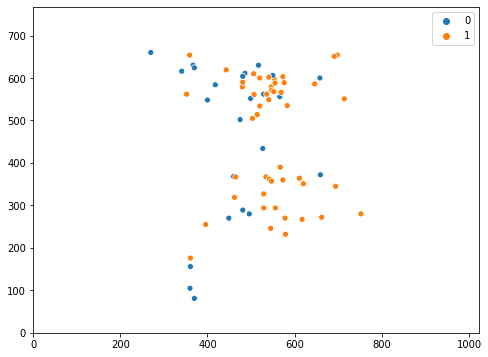

In [46]:
plt.figure(figsize=(8,6))
plt.ylim(0, 768)
plt.xlim(0, 1024)
sns.scatterplot(x, y, hue=array)

In [171]:
sns.scatterplot

<function seaborn.relational.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)>

In [25]:
print(sorted(set(d['df_fix_1']['fixation_count'])))

[0, 2, 4, 5, 6, 7, 8, 9, 10]
